In [37]:
# Dependencies
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
import scipy.stats as st
from scipy.stats import ttest_ind

In [5]:
#load csv file
main_path = Path("Resources/tech_layoffs.csv")
tech_layoffs_df = pd.read_csv(main_path)
tech_layoffs_df.head(10)

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
5,NextRoll,Unclear,3,7/8/2022,Marketing Tech,San Francisco,Business Insider,Private,NaN
6,Armis Security,25,4,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private,NaN
7,Foxtrot,26,4,9/23/2022,"food and beverage, e-commerce",Chicago,Chicago Business,Private,NaN
8,Headspace Health,50,4,12/14/2022,"telehealth, wellness",Los Angeles,Bloomberg,Private,NaN
9,RealSelf,11,5,7/21/2022,Beauty tech,Seattle,GeekWire,Private,NaN


In [6]:
# Retrieve column names
tech_layoffs_df.columns

Index(['company', 'total_layoffs', 'impacted_workforce_percentage',
       'reported_date', 'industry', 'headquarter_location', 'sources',
       'status', 'additional_notes'],
      dtype='object')

In [7]:
#rename columns 
tech_layoffs_df.rename(columns={
    'company': 'Company',
    'total_layoffs': 'Total Layoffs',
    'impacted_workforce_percentage': 'Impacted Workforce Percentage',
    'reported_date': 'Reported Date',
    'industry': 'Industry',
    'headquarter_location': 'Headquarter Location',
    'sources': 'Sources',
    'status': 'Status',
    'additional_notes': 'Additional Notes'
}, inplace=True)
tech_layoffs_df

,Company,Total Layoffs,Impacted Workforce Percentage,Reported Date,Industry,Headquarter Location,Sources,Status,Additional Notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
...,...,...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,1/4/2023,"enterprise tech, analytics",San Francisco,New York Times,Public,NaN
485,Oracle,Unclear,Unclear,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,Unclear,Unclear,9/15/2022,Customer service,New York,LinkedIn,Public,NaN
487,Skillz,Unclear,Unclear,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN


In [8]:
#delete any unnecessary column not useful for Data Analysis
tech_layoffs_df.drop(columns=['Additional Notes'], inplace=True)
tech_layoffs_df.head()

,Company,Total Layoffs,Impacted Workforce Percentage,Reported Date,Industry,Headquarter Location,Sources,Status
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private


In [9]:
#check datatypes
tech_layoffs_df.dtypes


Company                          object
Total Layoffs                    object
Impacted Workforce Percentage    object
Reported Date                    object
Industry                         object
Headquarter Location             object
Sources                          object
Status                           object
dtype: object

In [10]:
#replace unclear value to nan
tech_layoffs_df.replace('Unclear', np.nan, inplace=True)
tech_layoffs_df


,Company,Total Layoffs,Impacted Workforce Percentage,Reported Date,Industry,Headquarter Location,Sources,Status
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,NaN,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private
...,...,...,...,...,...,...,...,...
484,Salesforce,9090,NaN,1/4/2023,"enterprise tech, analytics",San Francisco,New York Times,Public
485,Oracle,NaN,NaN,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public
486,LivePerson,NaN,NaN,9/15/2022,Customer service,New York,LinkedIn,Public
487,Skillz,NaN,NaN,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public


In [11]:
#drop any na
tech_layoffs_df.dropna(how='any', inplace=True)

tech_layoffs_df

,Company,Total Layoffs,Impacted Workforce Percentage,Reported Date,Industry,Headquarter Location,Sources,Status
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private
6,Armis Security,25,4,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private
...,...,...,...,...,...,...,...,...
458,Latch,115,37,8/2/2022,PropTech,"New York, NY",Latch,Public
459,Sema4,750,39,11/14/2022,"AI, health care","Stamford, CT",MarketWatch,Public
460,Root Insurance,467,40,11/9/2022,InsurTech,Columbus,Columbus Dispatch,Public
461,Coinbase,2110,43,1/10/2023,Crypto,San Francisco,CNBC,Public


In [12]:
#changing datatypes
tech_layoffs_df['Total Layoffs'] = tech_layoffs_df['Total Layoffs'].astype('float')
tech_layoffs_df['Impacted Workforce Percentage'] = tech_layoffs_df['Impacted Workforce Percentage'].astype('float')
tech_layoffs_df['Reported Date'] = pd.to_datetime(tech_layoffs_df['Reported Date'])
tech_layoffs_df.dtypes


Company                                  object
Total Layoffs                           float64
Impacted Workforce Percentage           float64
Reported Date                    datetime64[ns]
Industry                                 object
Headquarter Location                     object
Sources                                  object
Status                                   object
dtype: object

In [13]:
#replacing duplicate locations in column Headquarter LOcation

tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('New York City', 'New York')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Austin', 'Austin, TX')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Palo Alto', 'Palo Alto, CA')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Mountain View', 'Mountain View, CA')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('New York, NY', 'New York')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Oakland', 'Oakland, CA')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('San Jos, CA', 'San Jose, CA')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Miami', 'Miami, FL')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Menlo Park', 'Menlo Park, CA')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Los Gatos', 'Los Gatos, CA')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('San Mateo', 'San Mateo, CA')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Santa Monica', 'Santa Monica, CA')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Burlington,Massachusetts','Burlington, MA')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Stamford', 'Stamford, CT')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Stockholm', 'Stockholm, Sweden')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Bend, Oregon', 'Bend, OR')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('Tempe', 'Tempe, AZ')
tech_layoffs_df['Headquarter Location'] = tech_layoffs_df['Headquarter Location'].replace('San Franicsco', 'San Francisco')


#print the DataFrame
tech_layoffs_df

,Company,Total Layoffs,Impacted Workforce Percentage,Reported Date,Industry,Headquarter Location,Sources,Status
0,C2FO,20.0,2.0,2022-12-09,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
2,Amperity,13.0,3.0,2022-08-20,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20.0,3.0,2023-01-18,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24.0,3.0,2022-05-13,Health Care,New York,Axios,Private
6,Armis Security,25.0,4.0,2022-12-08,Cybersecurity,San Francisco,Calcalistech,Private
...,...,...,...,...,...,...,...,...
458,Latch,115.0,37.0,2022-08-02,PropTech,New York,Latch,Public
459,Sema4,750.0,39.0,2022-11-14,"AI, health care","Stamford, CT",MarketWatch,Public
460,Root Insurance,467.0,40.0,2022-11-09,InsurTech,Columbus,Columbus Dispatch,Public
461,Coinbase,2110.0,43.0,2023-01-10,Crypto,San Francisco,CNBC,Public


In [14]:
#replacing duplicate locations in column Industry
tech_layoffs_df['Industry'] = tech_layoffs_df['Industry'].replace('aerospace,space', 'Shipping, Logistics')
tech_layoffs_df['Industry'] = tech_layoffs_df['Industry'].replace('shipping and logistics', 'aerospace')
tech_layoffs_df['Industry'] = tech_layoffs_df['Industry'].replace('Pharmacy, health care', 'Pharmaceutical, health care')
tech_layoffs_df['Industry'] = tech_layoffs_df['Industry'].replace('Virtual Event', 'Virtual Events')
tech_layoffs_df['Industry'] = tech_layoffs_df['Industry'].replace('Crypto', 'Cryptocurrency')
tech_layoffs_df['Industry'] = tech_layoffs_df['Industry'].replace('Robotics', 'robotics, AI')
tech_layoffs_df['Industry'] = tech_layoffs_df['Industry'].replace('artificial intelligence,robotics', 'robotics, AI')
tech_layoffs_df['Industry'] = tech_layoffs_df['Industry'].replace('Transporation', 'Transportation')
tech_layoffs_df['Industry'] = tech_layoffs_df['Industry'].replace('News,media', 'News')



#print the DataFrame
tech_layoffs_df.head()

,Company,Total Layoffs,Impacted Workforce Percentage,Reported Date,Industry,Headquarter Location,Sources,Status
0,C2FO,20.0,2.0,2022-12-09,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
2,Amperity,13.0,3.0,2022-08-20,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20.0,3.0,2023-01-18,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24.0,3.0,2022-05-13,Health Care,New York,Axios,Private
6,Armis Security,25.0,4.0,2022-12-08,Cybersecurity,San Francisco,Calcalistech,Private


In [15]:
#Total employee layoff based on company- Company Analysis
tech_layoffs_df['Total Employee'] = (tech_layoffs_df['Total Layoffs'] / (tech_layoffs_df['Impacted Workforce Percentage'] / 100)).round(2)
tech_layoffs_df[['Total Employee','Company', 'Impacted Workforce Percentage']]


,Total Employee,Company,Impacted Workforce Percentage
0,1000.00,C2FO,2.0
2,433.33,Amperity,3.0
3,666.67,Addepar,3.0
4,800.00,Thirty Madison,3.0
6,625.00,Armis Security,4.0
...,...,...,...
458,310.81,Latch,37.0
459,1923.08,Sema4,39.0
460,1167.50,Root Insurance,40.0
461,4906.98,Coinbase,43.0


In [16]:
#splitting date column
tech_layoffs_df['Month'] = tech_layoffs_df['Reported Date'].dt.month
tech_layoffs_df['Year'] = tech_layoffs_df['Reported Date'].dt.year
tech_layoffs_df.head()

,Company,Total Layoffs,Impacted Workforce Percentage,Reported Date,Industry,Headquarter Location,Sources,Status,Total Employee,Month,Year
0,C2FO,20.0,2.0,2022-12-09,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,1000.00,12,2022
2,Amperity,13.0,3.0,2022-08-20,"Saas, analytics",Seattle,Geekwire,Private,433.33,8,2022
3,Addepar,20.0,3.0,2023-01-18,"fintech, data analytics","Mountain View, CA",Fortune,Private,666.67,1,2023
4,Thirty Madison,24.0,3.0,2022-05-13,Health Care,New York,Axios,Private,800.00,5,2022
6,Armis Security,25.0,4.0,2022-12-08,Cybersecurity,San Francisco,Calcalistech,Private,625.00,12,2022


In [17]:
#total  number of layoffs by month-time analysis
tech_layoffs_by_month = tech_layoffs_df.groupby('Month')['Total Layoffs'].sum()
tech_layoffs_by_month


Month
1     30411.0
2       168.0
3       250.0
4      5679.0
5      2189.0
6      3386.0
7      4836.0
8      5758.0
9      2034.0
10     2636.0
11    24365.0
12     3097.0
Name: Total Layoffs, dtype: float64

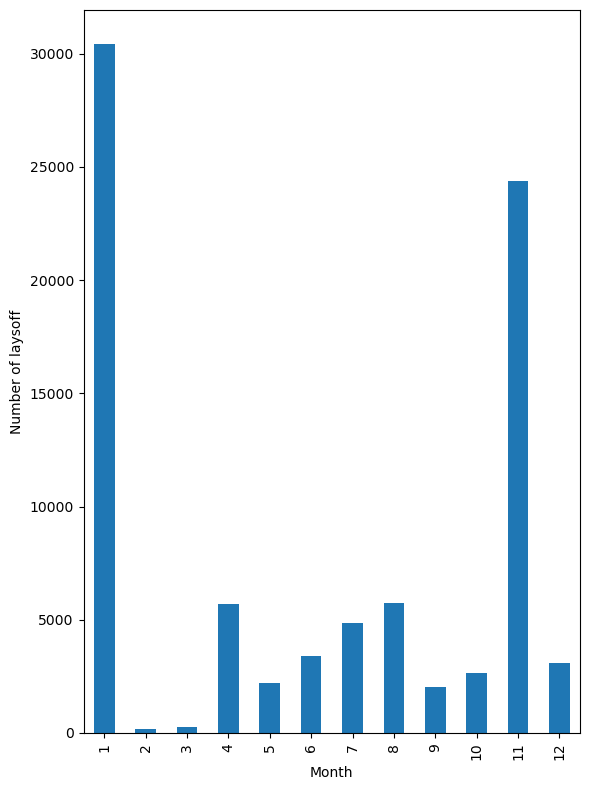

In [18]:
# Create a bar chart based off of the Month and number of layoffs 
layoffs_mounth_bar = tech_layoffs_by_month.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
layoffs_mounth_bar.set_xlabel("Month")
layoffs_mounth_bar.set_ylabel("Number of layoffs")
plt.tight_layout()
plt.show()


In [19]:
#total number of layoffs by month-time analysis
tech_layoffs_by_year = tech_layoffs_df.groupby('Year')['Total Layoffs'].sum()
tech_layoffs_by_year

Year
2022    54468.0
2023    30341.0
Name: Total Layoffs, dtype: float64

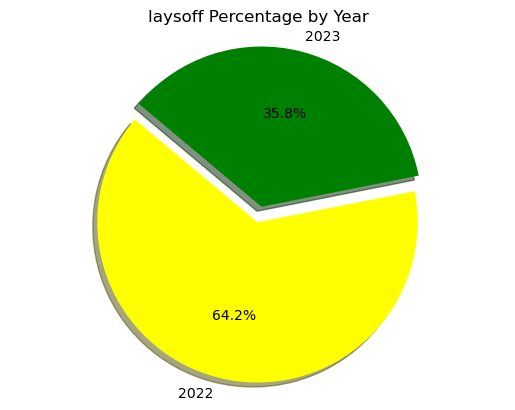

In [20]:
explode = (0.1,0)
colors=["yellow","green"]
labels=["2022","2023"]
plt.pie(tech_layoffs_by_year, explode=explode,colors=colors, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("laysoff Percentage by Year")
plt.show()

In [21]:
#Geographical analysis
tech_layoffs_by_location = tech_layoffs_df.groupby('Headquarter Location')['Total Layoffs'].sum()
layoffs_by_location = pd.DataFrame(tech_layoffs_by_location)
layoffs_by_location.head()

,Total Layoffs
Headquarter Location,
Atlanta,1113.0
"Austin, TX",240.0
"Bay Area, CA",110.0
"Bedford, MA",140.0
"Bellevue, WA",32.0


In [22]:
# draw chart based on headquarter location and number of layoffs

In [23]:
# Top 10 layoffs by location
top_layoffs_by_location = layoffs_by_location.sort_values(['Total Layoffs'], ascending=False)
top_layoffs_by_location.head(10)

,Total Layoffs
Headquarter Location,
Seattle,20314.0
San Francisco,18930.0
"Menlo Park, CA",12114.0
New York,9374.0
"San Jose, CA",4355.0
Chicago,1673.0
"Stockholm, Sweden",1338.0
"Venice, CA",1280.0
Atlanta,1113.0


In [25]:
#Bottom 10 layoffs by location
bottom_layoffs_by_location = layoffs_by_location.sort_values(['Total Layoffs'], ascending=True)
bottom_layoffs_by_location.head(10)

,Total Layoffs
Headquarter Location,
Indianapolis,5.0
"Leawood, KS",20.0
"Lehi, UT",20.0
"Bellevue, WA",32.0
Portland,40.0
Boulder,41.0
"Williston, VT",47.0
"Framingham, MA",55.0
"Bend, OR",56.0


In [26]:
layoffs_by_industry=tech_layoffs_df.groupby('Industry')['Total Layoffs'].sum()


industry_layoffs_df = pd.DataFrame(layoffs_by_industry)
industry_layoffs_df


,Total Layoffs
Industry,
AI,100.0
"AI, analytics",120.0
"AI, health care",750.0
"AgTech, food and beverage",50.0
Artificial Intelligence,59.0
...,...
"social impact, company benefits",100.0
"social impact, finance",140.0
"telecommunications, enterprise software",155.0


In [27]:
# Top 10 industry with highest number of laysoffs
top_layoffs_by_industry = industry_layoffs_df.sort_values(['Total Layoffs'], ascending=False)
top_layoffs_by_industry.head(10)

,Total Layoffs
Industry,
"E-commerce, SaaS",18000.0
Social media,12420.0
Fintech,8686.0
"enterprise software, SaaS",4100.0
Social Media,3765.0
Cryptocurrency,3503.0
PropTech,2712.0
"Food delivery, ecommerce",2180.0
Cybersecurity,1605.0


In [28]:
# 10 industry with lowest number of laysoff
lowest_layoffs_by_industry = industry_layoffs_df.sort_values(['Total Layoffs'], ascending=True)
lowest_layoffs_by_industry.head(10)

,Total Layoffs
Industry,
"Artificial intelligence, recruiting",5.0
"Privacy Tech, Marketing Tech",7.0
Beauty tech,11.0
"Media, Content Creators",13.0
"Saas, analytics",13.0
"Employee Benefits, HR Tech",16.0
"Transporation, Logistics",16.0
Communications Infrastructure,20.0
"Media, E-commerce",20.0


In [36]:
# groupby status
tech_layoffs_by_status = tech_layoffs_df.groupby("Status")["Total Layoffs"].sum()
tech_layoffs_by_status

Status
Private    24758.0
Public     60051.0
Name: Total Layoffs, dtype: float64

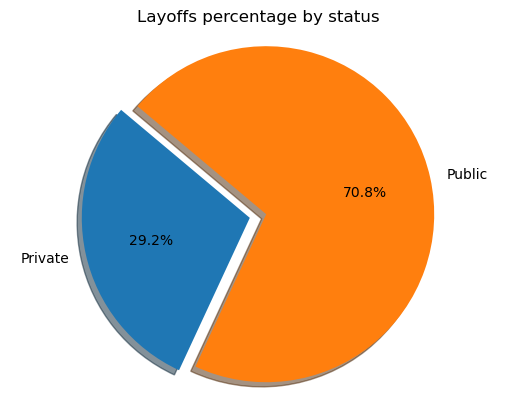

In [35]:
# showing the percentage of layoffs based on the status(private vs public)
explode = (0.1,0)
colors=["blue","red"]
labels=["Private","Public"]
plt.pie(tech_layoffs_by_status, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Layoffs percentage by status")
plt.show()

In [38]:
#data summary analysis-Total number of layoffs,company specific analysismean_tl = tech_layoffs_df['Total Layoffs'].mean()
mean_iwp = tech_layoffs_df['Impacted Workforce Percentage'].mean()
mean_tl = tech_layoffs_df["Total Layoffs"].mean()
median_tl = tech_layoffs_df['Total Layoffs'].median()
median_iwp = tech_layoffs_df['Impacted Workforce Percentage'].median()

mode_tl = tech_layoffs_df['Total Layoffs'].mode().values[0]
mode_iwp = tech_layoffs_df['Impacted Workforce Percentage'].mode().values[0]

print("Mean Total Layoffs:", mean_tl)
print("Mean Impacted Workforce Percentage:", mean_iwp)
print("Median Total Layoffs:", median_tl)
print("Median Impacted Workforce Percentage:", median_iwp)
print("Mode Total Layoffs:", mode_tl)
print("Mode Impacted Workforce Percentage:", mode_iwp)


Mean Total Layoffs: 353.37083333333334
Mean Impacted Workforce Percentage: 19.820833333333333
Median Total Layoffs: 92.0
Median Impacted Workforce Percentage: 15.0
Mode Total Layoffs: 100.0
Mode Impacted Workforce Percentage: 20.0


In [ ]:
tech_layoffs_df['Status'] = tech_layoffs_df['Status'].astype('category').cat.codes
tech_layoffs_df['Total Layoffs']=tech_layoffs_df['Total Layoffs'].astype('category').cat.codes
tech_layoffs_df.corr()

In [ ]:
#data visualization- bar plot, scatter plot, box plot??